# Housing 

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
hs= pd.read_csv("Housing.csv")
hs.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [109]:
hs.shape

(545, 13)

In [110]:
hs.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [111]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [112]:
hs.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


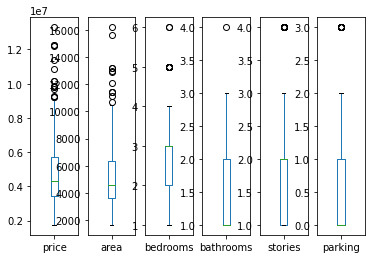

In [113]:
hs.plot(kind="box", subplots=True);

In [114]:
Q1,Q3=hs["price"].quantile([0.25,0.75])
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

hs["price"]=np.where(hs["price"]>UL, UL, hs["price"])

In [117]:
Q1,Q3=hs["area"].quantile([0.25,0.75])
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

hs["area"]=np.where(hs["area"]>UL, UL, hs["area"])

In [118]:
Q1,Q3=hs["bedrooms"].quantile([0.25,0.75])
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

hs["bedrooms"]=np.where(hs["bedrooms"]>UL, UL, hs["bedrooms"])

In [120]:
Q1,Q3=hs["bathrooms"].quantile([0.25,0.75])
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

hs["bathrooms"]=np.where(hs["bathrooms"]>UL, UL, hs["bathrooms"])

In [121]:
Q1,Q3=hs["stories"].quantile([0.25,0.75])
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

hs["stories"]=np.where(hs["stories"]>UL, UL, hs["stories"])

In [122]:
Q1,Q3=hs["parking"].quantile([0.25,0.75])
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

hs["parking"]=np.where(hs["parking"]>UL, UL, hs["parking"])

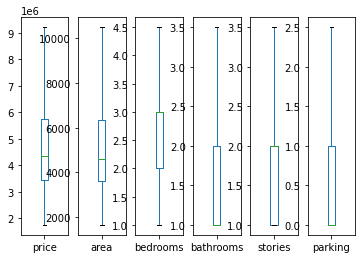

In [123]:
hs.plot(kind="box", subplots=True);

In [125]:
hs.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [126]:
hs.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [127]:
hs.basement.value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [128]:
hs.hotwaterheating.value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [129]:
hs.airconditioning.value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [130]:
hs.prefarea.value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [131]:
hs.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [132]:
new_hs = pd.get_dummies(hs, drop_first=True)

In [133]:
X = new_hs.iloc[:,1:]
y = new_hs.iloc[:,0]

In [134]:
X.shape, y.shape

((545, 13), (545,))

In [135]:
from sklearn.model_selection import train_test_split
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=2020)

In [136]:
X_train.shape, X_test.shape

((381, 13), (164, 13))

In [137]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.coef_.round(3)

array([ 2.77174000e+02,  8.22181390e+04,  8.89720043e+05,  5.67274656e+05,
        2.67499077e+05,  4.39812272e+05,  2.35750442e+05,  3.95019450e+05,
        7.55014242e+05,  6.73164929e+05,  4.82432887e+05,  9.19001620e+04,
       -1.71316195e+05])

In [138]:
lr.intercept_

-171145.30057401117

In [139]:
p_train=lr.predict(X_train)
p_test=lr.predict(X_test)

In [140]:
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
RMSE_Train=mean_squared_error(y_train, p_train, squared=False)
RMSE_Test=mean_squared_error(y_test, p_test, squared=False)

In [142]:
RMSE_Train/y_train.mean()

0.20155456925232343

In [143]:
RMSE_Test/y_test.mean()

0.21788892584047484

In [144]:
r2_train=r2_score(y_train, p_train)
r2_test=r2_score(y_test, p_test)

In [145]:
r2_train, r2_test

(0.6944163962293924, 0.6679833868208256)

In [147]:
# Pickling of model
import pickle
pickle.dump(lr, open("Housing_reg_model.pkl", 'wb'))

In [148]:
pickled_model=pickle.load(open("Housing_reg_model.pkl", 'rb'))
pickled_model.predict(new_hs.drop('price',axis=1))

array([7826028.9850553 , 9522410.64705221, 7694312.27110166,
       7809697.22004044, 6517371.29107636, 8008075.0918304 ,
       9412808.10099686, 7181366.51328854, 7188282.34758814,
       7361503.1337734 , 7535530.83509155, 8076974.08711826,
       6842014.22727588, 5771649.54424218, 6165599.30565257,
       5306769.31767363, 7223426.45043808, 7844362.96761438,
       6148223.68982319, 6723763.49726722, 5513913.47348555,
       6512831.29244879, 5774998.89966087, 6264657.11183157,
       7076603.11720092, 7645611.29605061, 7821533.30916551,
       4791632.60852515, 7269885.18222396, 6946001.21015225,
       7388943.64949265, 6630782.41972072, 6287233.85505167,
       6697939.32020668, 6130220.4920225 , 7428602.30007039,
       7575345.85701986, 8065167.99561723, 6326142.72544495,
       7058047.74587352, 5905696.25653046, 7198645.81511488,
       7113155.7400218 , 6652381.89414695, 6966147.58351496,
       6424693.20206363, 6883929.44469344, 7044195.1717494 ,
       5112360.36367097,